<a href="https://colab.research.google.com/github/saigirishgilly98/Data-Analytics-Project/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">**Churn prediction and Item recommendation on online retail dataset**</font>

## **Problem Statement**:

Given a transactional dataset, tasks to perform : <font color="blue">Exploratory Data Analysis (EDA), Data pre-processing, Customer Segmentation, User profiling, Item recommendation for each users and churn prediction</font>

# <font color="blue">**Exploratory Data Analysis (EDA)**</font>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv file into dataframe
dataset = pd.read_csv('data.csv', encoding='unicode_escape')
dataset.head(10) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
# Exploring number of observations and attributes
dataset.shape

(541909, 8)

In [4]:
# Exploring names of the attributes
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# Exploring the types of the attributes
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# Exploring the statistics of the numerical attributes
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# <font color="blue">**Data Pre-Processing**</font>

## **Imputation**

In [7]:
# calculating number of missing values in each of the attributes
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# threshold to drop the observations if the proportion of null values is more than the threshold.
threshold = 0.4

In [9]:
# proportion of null values in description attribute
dataset['Description'].isnull().sum() / dataset.shape[0]

0.002683107311375157

The proportion of null values in `Description` attribute is less than the `threshold`, hence safe to drop the observations with null values.

In [10]:
# Dropping the observations with null values for Description attribute
dataset.dropna(subset=['Description'], inplace=True)

In [11]:
# Validation of the dropped observations with null values for Description attribute
dataset['Description'].isnull().sum()

0

In [12]:
# proportion of null values in CustomerID attribute
dataset['CustomerID'].isnull().sum() / dataset.shape[0]

0.24724722687365275

The proportion of null values in `CustomerID` attribute is less than the `threshold`, hence safe to drop the observations with null values.


In [13]:
# Dropping the observations with null values for customerID attribute
dataset.dropna(subset=['CustomerID'], inplace=True)

In [14]:
# Validation of the dropped observations with null values for CustomerID attribute
dataset['CustomerID'].isnull().sum()

0

In [15]:
# New shape of the dataset after dropping the observation with null values
dataset.shape

(406829, 8)

In [16]:
# No attribute with null values
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Binning**

In [17]:
# Obtaining the classes of Country categorical attribute 
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [18]:
# Obtaining the counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Replacing the `Country` name class with `others` whose frequency is less than 100

In [19]:
dataset['Country'] = dataset['Country'].replace(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'], 'Others')

In [20]:
# Obtaining the new counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Others                356
Poland                341
USA                   291
Israel                250
Unspecified           244
Singapore             229
Iceland               182
Canada                151
Greece                146
Malta                 127
Name: Country, dtype: int64

## **Removing and handling Outliers**

Removing the outlier rows by using InterQuartile range

In [21]:
# Statistical description of Quantity attribute
dataset['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [22]:
# Obtaining q1, q3, iqr, upper and lower limits for Quantity attribute
a = []
a = np.sort(dataset['Quantity'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 27.0
lower limit : -3.0


In [23]:
# Removing the outliers by filtering
dataset = dataset[(dataset['Quantity'] < upper_lim) & (dataset['Quantity'] > lower_lim)]

In [24]:
# Statistical description of UnitPrice attribute
dataset['UnitPrice'].describe()

count    377398.000000
mean          3.601225
std          71.955740
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [25]:
# Obtaining q1, q3, iqr, upper and lower limits for UnitPrice attribute
a = []
a = np.sort(dataset['UnitPrice'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 7.5
lower limit : 0.0


In [26]:
# Removing the outliers by filtering
dataset = dataset[(dataset['UnitPrice'] < upper_lim) & (dataset['UnitPrice'] > lower_lim)]

In [27]:
# Obtaining the negative and 0 values of Quantity attribute
a = []
for i in dataset['Quantity']:
  if i <= 0:
    a.append(i)

print(a)

[-1, -1, -2, -1, -1, -1, -2, -1, -1, -2, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -2, -1, -2, -1, -2, -1, -1, -1, -1, -2, -1, -1, -1, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -2, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -2, -1, -2, -1, -1, -1, -2, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1,

In [28]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['Quantity'] > 0]

In [29]:
# Obtaining the negative and 0 values of UnitPrice attribute
b = []
for i in dataset['UnitPrice']:
  if i <= 0:
    b.append(i)
print(b)

[]


In [30]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['UnitPrice'] > 0]

In [31]:
# New shape of the dataset
dataset.shape

(337527, 8)

## **Log Transformation**

In [32]:
# Applying log transformation on Quantity and UnitPrice attributes
dataset['Log_Transformed_Quantity'] = dataset['Quantity'].transform(np.log1p)
dataset['Log_Transformed_UnitPrice'] = dataset['UnitPrice'].transform(np.log1p)

In [33]:
# Exploring the dataset after transformations
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402


## **Scaling**

### 1. Normalization

In [34]:
dataset['Normalized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].min()) / (dataset['Quantity'].max() - dataset['Quantity'].min())

dataset['Normalized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].min()) / (dataset['UnitPrice'].max() - dataset['UnitPrice'].min()) 

### 2. Standardization

In [35]:
dataset['Standardized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].mean()) / dataset['Quantity'].std()

dataset['Standardized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].mean()) / dataset['UnitPrice'].std()

In [36]:
# Exploring the dataset after scaling
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203


## **Date & Time extraction**

In [37]:
# Creating the attributes for date, month, year, weekday and time of InvoiceDate
dataset['Date'] = pd.to_datetime(dataset['InvoiceDate']).dt.day

dataset['Month'] = pd.to_datetime(dataset['InvoiceDate']).dt.month

dataset['Year'] = pd.to_datetime(dataset['InvoiceDate']).dt.year

dataset['Weekday'] = pd.to_datetime(dataset['InvoiceDate']).dt.day_name()

dataset['Time'] = pd.to_datetime(dataset['InvoiceDate']).dt.time

In [38]:
# Exploring the created date, day, time attributes
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697,1,12,2010,Wednesday,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00


## **Visual Representation**

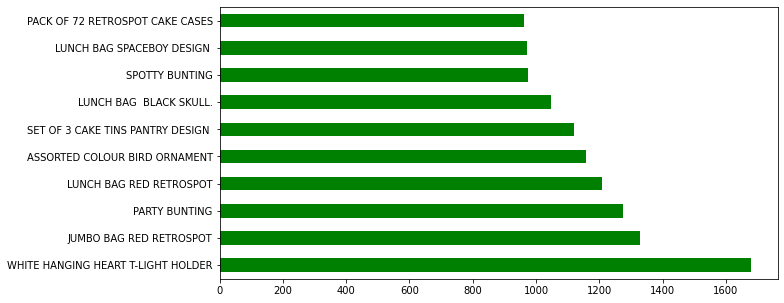

In [39]:
# Exploring the description of the 10 products with the highest count
dataset['Description'].value_counts()[:10].plot(kind='barh', color='green', figsize=(10, 5))

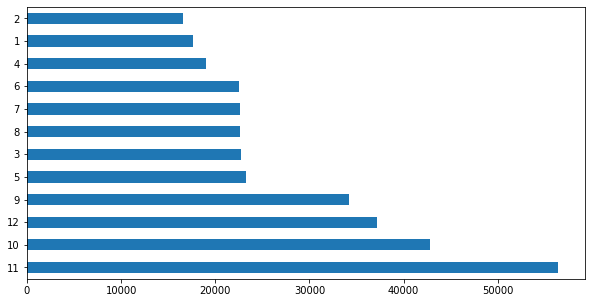

In [40]:
# Exploring the sales in different months
dataset['Month'].value_counts().plot(kind='barh', figsize=(10,5))

From the graph, we can interpret that November recorded most sales and February recorded least sales.

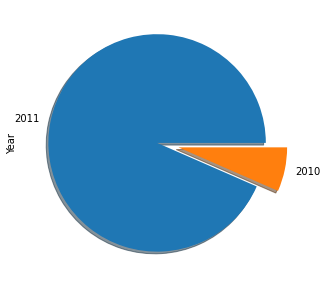

In [41]:
# Exploring the number of sales by year
dataset['Year'].value_counts().plot(kind='pie', explode=(0,0.2), shadow=True, figsize=(10,5))

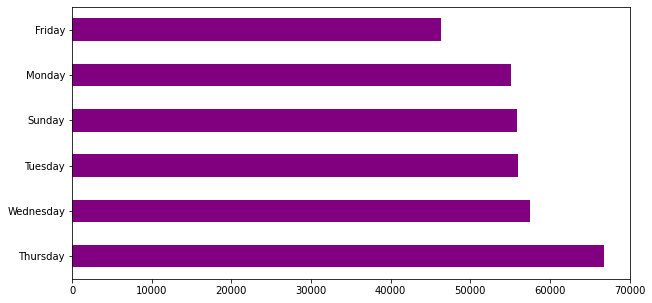

In [42]:
# Exploring the number of sales by days
dataset['Weekday'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

From the above graph, we can interpret that the store used to be closed on saturdays and the maximum sales used to happen on thursday as opposed to the least sales on Friday.

# <font color="blue">**Customer Segmentation**</font>

In [43]:
# Exploring the dataset grouped by InvoiceNo and Description
dataset.groupby(['InvoiceNo', 'Description']).size()[:50]

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         1
           GLASS STAR FROSTED T-LIGHT HOLDER      1
           KNITTED UNION FLAG HOT WATER BOTTLE    1
           RED WOOLLY HOTTIE WHITE HEART.         1
           WHITE HANGING HEART T-LIGHT HOLDER     1
           WHITE METAL LANTERN                    1
536366     HAND WARMER RED POLKA DOT              1
           HAND WARMER UNION JACK                 1
536367     BOX OF 6 ASSORTED COLOUR TEASPOONS     1
           BOX OF VINTAGE JIGSAW BLOCKS           1
           FELTCRAFT PRINCESS CHARLOTTE DOLL      1
           HOME BUILDING BLOCK WORD               1
           IVORY KNITTED MUG COSY                 1
           LOVE BUILDING BLOCK WORD               1
           POPPY'S PLAYHOUSE BEDROOM              1
           POPPY'S PLAYHOUSE KITCHEN              1
536368     BLUE COAT RACK PARIS FASHION           1
           JAM MAKING SET WITH JARS               1
           RED CO

In [44]:
# Exploring the dataset grouped by CustomerID and Description
dataset.groupby(['CustomerID', 'Description']).size()

CustomerID  Description                      
12347.0     3D DOG PICTURE PLAYING CARDS         3
            3D SHEET OF CAT STICKERS             1
            3D SHEET OF DOG STICKERS             1
            60 TEATIME FAIRY CAKE CASES          3
            72 SWEETHEART FAIRY CAKE CASES       3
                                                ..
18287.0     SMALL YELLOW BABUSHKA NOTEBOOK       1
            STAR T-LIGHT HOLDER WILLIE WINKIE    1
            STRAWBERRY CERAMIC TRINKET BOX       1
            SWISS CHALET TREE DECORATION         2
            TREE T-LIGHT HOLDER WILLIE WINKIE    1
Length: 232548, dtype: int64

## **1. Products Ordered**

In [45]:
def encode_column(column):
  if column > 0:
    return 1
  if column <= 0:
    return 0

# Function to get the count of the products ordered
def aggregate_by_ordered_quantity(dataframe, column_list):

  aggregated_dataframe = dataframe.groupby(column_list).Quantity.count().reset_index()

  aggregated_dataframe['Products_ordered'] = aggregated_dataframe.Quantity.apply(encode_column)

  final_dataframe = aggregated_dataframe.groupby(column_list[0]).Products_ordered.sum().reset_index()

  return final_dataframe

In [46]:
# Creating customers dataframe
customers = aggregate_by_ordered_quantity(dataset, ['CustomerID', 'Description'])

customers.head()

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49


## **2. Total Spending**

Creating a `Sales` attribute which is product of `Quantity` and `UnitPrice`.

In [47]:
dataset['Sales'] = dataset['Quantity'] * dataset['UnitPrice']

# Exploring the dataset to validate the Sales attribute
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34


In [48]:
# Obtaining customers total spending
customer_total_spending = dataset.groupby('CustomerID').Sales.sum().reset_index()

customer_total_spending.rename(columns = {'Sales' : 'Total_spending'}, inplace = True)

In [49]:
# Merging the two dataframes on CustomerID
customers = pd.merge(customers, customer_total_spending, on='CustomerID')

print(f'The number of customers from the existing customer base : {customers.shape[0]}')

customers.head()

The number of customers from the existing customer base : 4190


,CustomerID,Products_ordered,Total_spending
0,12347.0,96,3314.73
1,12348.0,6,90.20
2,12349.0,57,984.15
3,12350.0,16,294.40
4,12352.0,49,1130.94


## **Scaling using Log1p transform**

In [50]:
# Function to apply log1p transformation
def apply_log1p_transformation(dataframe, column):

  dataframe['log_' + column] = np.log1p(dataframe[column])
  return dataframe['log_' + column]

### 1. Products ordered

In [51]:
apply_log1p_transformation(customers, 'Products_ordered')

0       4.574711
1       1.945910
2       4.060443
3       2.833213
4       3.912023
          ...   
4185    2.197225
4186    1.791759
4187    2.197225
4188    5.594711
4189    3.850148
Name: log_Products_ordered, Length: 4190, dtype: float64

### 2. Total spending

In [52]:
apply_log1p_transformation(customers, 'Total_spending')

0       8.106433
1       4.513055
2       6.892794
3       5.688330
4       7.031688
          ...   
4185    4.927254
4186    3.869533
4187    4.737338
4188    7.627048
4189    6.868765
Name: log_Total_spending, Length: 4190, dtype: float64

In [53]:
# Exploring the dataset to validate the log transformed attributes
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending
0,12347.0,96,3314.73,4.574711,8.106433
1,12348.0,6,90.20,1.945910,4.513055
2,12349.0,57,984.15,4.060443,6.892794
3,12350.0,16,294.40,2.833213,5.688330
4,12352.0,49,1130.94,3.912023,7.031688


## **Feature Selection**

In [54]:
customers.iloc[:,3:]

,log_Products_ordered,log_Total_spending
0,4.574711,8.106433
1,1.945910,4.513055
2,4.060443,6.892794
3,2.833213,5.688330
4,3.912023,7.031688
...,...,...
4185,2.197225,4.927254
4186,1.791759,3.869533
4187,2.197225,4.737338
4188,5.594711,7.627048


# <font color="blue">**K-Means Clustering**</font>

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

kmeans_model.fit(customers.iloc[:,3:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Intracluster distance

In [57]:
print(f'Intracluster distance of the model is: ', kmeans_model.inertia_)

Intracluster distance of the model is:  1197.6768152532238


This distance needs to be minimized by finding optimal hyper paramter.

## **Hyperparameter tuning**

In [58]:
def make_list_of_K(K, dataframe):

  cluster_values = list(range(1, K+1))
  inertia_values = []

  for c in cluster_values:
    model = KMeans(n_clusters=c, init='k-means++', max_iter=500, random_state=42)
    model.fit(dataframe)
    inertia_values.append(model.inertia_)
  
  return inertia_values

In [59]:
# Checking for k values between 1 to 15
results = make_list_of_K(15, customers.iloc[:, 3:])

In [60]:
k_values_distances = pd.DataFrame({'clusters': list(range(1, 16)), 'Intracluster distances': results})

print(k_values_distances)

    clusters  Intracluster distances
0          1            11756.716152
1          2             4790.968733
2          3             2965.444740
3          4             2211.197176
4          5             1810.651161
5          6             1565.831656
6          7             1354.825184
7          8             1197.676815
8          9             1054.114349
9         10              957.658328
10        11              873.862032
11        12              799.969961
12        13              745.265932
13        14              701.321098
14        15              660.753548


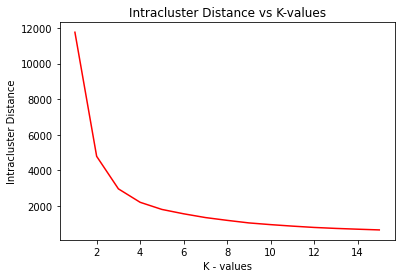

In [61]:
plt.plot(k_values_distances['clusters'], k_values_distances['Intracluster distances'], color='red')
plt.xlabel('K - values')
plt.ylabel('Intracluster Distance')
plt.title('Intracluster Distance vs K-values')
plt.show()

From the graph, its clear that after k = 4, the descent gets stabilized so the optimal k is 4.  

In [62]:
# Updating model with optimal k
updated_kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42)

updated_kmeans_model.fit_predict(customers.iloc[:, 3:])

array([3, 1, 0, ..., 1, 3, 0], dtype=int32)

## Adding cluster centers

In [63]:
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_

actual_data = np.expm1(cluster_centers)

add_points = np.append(actual_data, cluster_centers, axis=1)

add_points

array([[5.01698019e+01, 7.63545604e+02, 3.93514955e+00, 6.63928168e+00],
       [4.65081991e+00, 7.68378454e+01, 1.73180065e+00, 4.35462776e+00],
       [1.83642140e+01, 2.63280006e+02, 2.96342672e+00, 5.57700917e+00],
       [1.31292199e+02, 2.67581235e+03, 4.88501311e+00, 7.89238194e+00]])

In [64]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers['clusters'] = updated_kmeans_model.labels_

In [65]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=['Products_ordered', 'Total_spending', 'log_Products_ordered', 'log_Total_spending', 'clusters'])

centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,50.169802,763.545604,3.935150,6.639282,0.0
1,4.650820,76.837845,1.731801,4.354628,1.0
2,18.364214,263.280006,2.963427,5.577009,2.0
3,131.292199,2675.812348,4.885013,7.892382,3.0


In [66]:
# Changing the type of clusters attribute to int
centers_df['clusters'] = centers_df['clusters'].astype('int')
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,50.169802,763.545604,3.935150,6.639282,0
1,4.650820,76.837845,1.731801,4.354628,1
2,18.364214,263.280006,2.963427,5.577009,2
3,131.292199,2675.812348,4.885013,7.892382,3


In [67]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,12347.0,96,3314.73,4.574711,8.106433,3
1,12348.0,6,90.20,1.945910,4.513055,1
2,12349.0,57,984.15,4.060443,6.892794,0
3,12350.0,16,294.40,2.833213,5.688330,2
4,12352.0,49,1130.94,3.912023,7.031688,0
5,12353.0,2,29.30,1.098612,3.411148,1
6,12354.0,40,682.69,3.713572,6.527505,0
7,12355.0,9,219.00,2.302585,5.393628,2
8,12356.0,33,1086.56,3.526361,6.991692,0
9,12357.0,95,3195.41,4.564348,8.069784,3


## **Cluster Visualization**

In [68]:
# Creating the attribute Cluster_name
customers['Cluster_name'] = customers['clusters'].astype(str)

customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,3,3
1,12348.0,6,90.20,1.945910,4.513055,1,1
2,12349.0,57,984.15,4.060443,6.892794,0,0
3,12350.0,16,294.40,2.833213,5.688330,2,2
4,12352.0,49,1130.94,3.912023,7.031688,0,0
5,12353.0,2,29.30,1.098612,3.411148,1,1
6,12354.0,40,682.69,3.713572,6.527505,0,0
7,12355.0,9,219.00,2.302585,5.393628,2,2
8,12356.0,33,1086.56,3.526361,6.991692,0,0
9,12357.0,95,3195.41,4.564348,8.069784,3,3


In [69]:
# Obtaining the value counts of all the clusters.
magnitude_df = pd.DataFrame(customers.Cluster_name.value_counts().reset_index())

magnitude_df.rename(columns={'index':'Customer Groups', 'Cluster_name': 'Customer Group Magnitude'}, inplace=True)

magnitude_df

,Customer Groups,Customer Group Magnitude
0,2,1384
1,0,1348
2,3,805
3,1,653


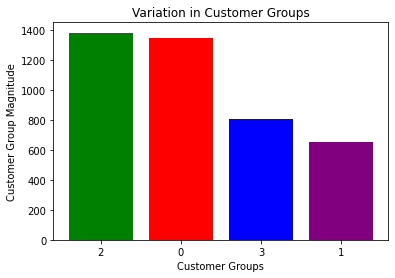

In [71]:
# Plotting the bar graph to interpret the number of customers in each clusters
plt.bar(magnitude_df['Customer Groups'], magnitude_df['Customer Group Magnitude'], color=['green', 'red', 'blue', 'purple'])
plt.xlabel('Customer Groups')
plt.ylabel('Customer Group Magnitude')
plt.title('Variation in Customer Groups')
plt.show()

# <font color="blue">**Customer Profiling**</font>

## Number of products brought by each customerID

In [72]:
customers.iloc[:,:2]

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49
...,...,...
4185,18280.0,8
4186,18281.0,5
4187,18282.0,8
4188,18283.0,268


## Total bill of each customerID

In [73]:
customers[['CustomerID', 'Total_spending']]

,CustomerID,Total_spending
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,984.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4185,18280.0,137.00
4186,18281.0,46.92
4187,18282.0,113.13
4188,18283.0,2051.98


## **Customers Grouping based on customer segmentation**

### **Group 0**

In [74]:
customers[customers['clusters'] == 0]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
2,12349.0,57,984.15,4.060443,6.892794,0,0
4,12352.0,49,1130.94,3.912023,7.031688,0,0
6,12354.0,40,682.69,3.713572,6.527505,0,0
8,12356.0,33,1086.56,3.526361,6.991692,0,0
16,12364.0,67,1106.28,4.219508,7.009662,0,0
...,...,...,...,...,...,...,...
4168,18252.0,81,385.67,4.406719,5.957572,0,0
4171,18259.0,26,2203.60,3.295837,7.698301,0,0
4175,18263.0,49,1042.40,3.912023,6.950240,0,0
4176,18265.0,34,609.11,3.555348,6.413639,0,0


### **Group1**

In [76]:
customers[customers['clusters'] == 1]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
1,12348.0,6,90.20,1.945910,4.513055,1,1
5,12353.0,2,29.30,1.098612,3.411148,1,1
18,12367.0,9,138.30,2.302585,4.936630,1,1
42,12401.0,2,32.85,1.098612,3.521939,1,1
44,12403.0,2,92.90,1.098612,4.542230,1,1
...,...,...,...,...,...,...,...
4180,18273.0,1,102.00,0.693147,4.634729,1,1
4183,18277.0,8,110.38,2.197225,4.712948,1,1
4185,18280.0,8,137.00,2.197225,4.927254,1,1
4186,18281.0,5,46.92,1.791759,3.869533,1,1


### **Group2**

In [77]:
customers[customers['clusters'] == 2]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
3,12350.0,16,294.40,2.833213,5.688330,2,2
7,12355.0,9,219.00,2.302585,5.393628,2,2
10,12358.0,9,878.22,2.302585,6.779035,2,2
13,12361.0,9,174.90,2.302585,5.169916,2,2
15,12363.0,19,484.50,2.995732,6.185179,2,2
...,...,...,...,...,...,...,...
4174,18262.0,13,149.48,2.639057,5.013830,2,2
4178,18270.0,10,244.90,2.397895,5.504925,2,2
4181,18274.0,10,163.17,2.397895,5.100902,2,2
4182,18276.0,12,213.46,2.564949,5.368123,2,2


### **Group3**

In [78]:
customers[customers['clusters'] == 3]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,3,3
9,12357.0,95,3195.41,4.564348,8.069784,3,3
11,12359.0,157,3224.13,5.062595,8.078729,3,3
12,12360.0,97,1843.16,4.584967,7.519779,3,3
14,12362.0,172,4098.94,5.153292,8.318728,3,3
...,...,...,...,...,...,...,...
4163,18245.0,139,2266.43,4.941642,7.726402,3,3
4170,18257.0,86,1997.26,4.465908,7.600032,3,3
4172,18260.0,76,2082.31,4.343805,7.641713,3,3
4179,18272.0,90,2794.96,4.510860,7.935931,3,3


## Frequency of customers visiting the store

In [79]:
frequency_of_customer = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

frequency_of_customer

CustomerID
12347.0     7
12348.0     3
12349.0     1
12350.0     1
12352.0     7
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4190, dtype: int64

In [80]:
customers = pd.merge(customers, frequency_of_customer, on='CustomerID')

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,InvoiceNo
0,12347.0,96,3314.73,4.574711,8.106433,3,3,7
1,12348.0,6,90.20,1.945910,4.513055,1,1,3
2,12349.0,57,984.15,4.060443,6.892794,0,0,1
3,12350.0,16,294.40,2.833213,5.688330,2,2,1
4,12352.0,49,1130.94,3.912023,7.031688,0,0,7


In [81]:
customers.rename(columns = {'InvoiceNo': 'Frequency_of_customer'}, inplace=True)

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,Frequency_of_customer
0,12347.0,96,3314.73,4.574711,8.106433,3,3,7
1,12348.0,6,90.20,1.945910,4.513055,1,1,3
2,12349.0,57,984.15,4.060443,6.892794,0,0,1
3,12350.0,16,294.40,2.833213,5.688330,2,2,1
4,12352.0,49,1130.94,3.912023,7.031688,0,0,7


## Customer visit number per year and per month

In [82]:
new_dataset = dataset[['InvoiceNo', 'CustomerID', 'Year', 'Month']]

new_dataset.head()

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
1,536365,17850.0,2010,12
2,536365,17850.0,2010,12
3,536365,17850.0,2010,12
4,536365,17850.0,2010,12


In [83]:
# Dropping the duplicates
new_dataset.drop_duplicates(inplace=True)

new_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
7,536366,17850.0,2010,12
10,536367,13047.0,2010,12
21,536368,13047.0,2010,12
25,536369,13047.0,2010,12


In [84]:
# Dropping the index
new_dataset = new_dataset.reset_index(drop=True)

In [85]:
# Obtaining number of visits per year
new_dataset['Visit_no_yr'] = new_dataset.groupby(['CustomerID', 'Year']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr
0,536365,17850.0,2010,12,1
1,536366,17850.0,2010,12,2
2,536367,13047.0,2010,12,1
3,536368,13047.0,2010,12,2
4,536369,13047.0,2010,12,3
...,...,...,...,...,...
16815,581581,17581.0,2011,12,21
16816,581582,17581.0,2011,12,22
16817,581585,15804.0,2011,12,13
16818,581586,13113.0,2011,12,23


In [86]:
# Number of visits per month
new_dataset['Visit_no_month'] = new_dataset.groupby(['CustomerID', 'Month']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr,Visit_no_month
0,536365,17850.0,2010,12,1,1
1,536366,17850.0,2010,12,2,2
2,536367,13047.0,2010,12,1,1
3,536368,13047.0,2010,12,2,2
4,536369,13047.0,2010,12,3,3
...,...,...,...,...,...,...
16815,581581,17581.0,2011,12,21,4
16816,581582,17581.0,2011,12,22,5
16817,581585,15804.0,2011,12,13,1
16818,581586,13113.0,2011,12,23,2


# <font color='blue'>**Item Recommendation system using Word2Vec**</font>

In [87]:
no_of_customers =  list(dataset['CustomerID'].unique())

print(f'Number of unique customers are {len(no_of_customers)}')

Number of unique customers are 4190


In [88]:
# Typecasting
dataset['StockCode'] = dataset['StockCode'].astype(str)

### Shuffling the customers and using 90% of it for creating the model & then splitting into train and validation dataset

In [89]:
import random

random.shuffle(no_of_customers)

customers_train = [no_of_customers[i] for i in range(round(0.9 * len(no_of_customers)))]

train_dataset = dataset[dataset['CustomerID'].isin(customers_train)]
validation_dataset = dataset[~dataset['CustomerID'].isin(customers_train)]

## List of purchases made by the customer 

In [90]:
from tqdm import tqdm

### 1. Training dataset

In [91]:
purchases_train = []

for i in tqdm(customers_train):
  temp = list(train_dataset[train_dataset['CustomerID'] == i]['StockCode'])
  purchases_train.append(temp)

100%|██████████| 3771/3771 [00:06<00:00, 624.33it/s]


### 2. Validation dataset

In [92]:
purchases_val = []

for i in tqdm(validation_dataset['CustomerID'].unique()):
  temp = list(validation_dataset[validation_dataset['CustomerID'] == i]['StockCode'])
  purchases_val.append(temp)

100%|██████████| 419/419 [00:00<00:00, 924.41it/s]


In [93]:
from gensim.models import Word2Vec

### Creating the Word2Vec model

In [94]:
model = Word2Vec(window = 10, sg = 1, hs = 0, negative = 10, alpha = 0.03, min_alpha = 0.0007, seed = 14)

model.build_vocab(purchases_train, progress_per = 200)

model.train(purchases_train, total_examples = model.corpus_count, epochs = 10, report_delay = 1)

(3026821, 3058330)

In [95]:
model.init_sims(replace=True)

print(model)

Word2Vec(vocab=2879, size=100, alpha=0.03)


### Each vector of 2879 unique vocabulary words has the size of 100

In [96]:
X = model[model.wv.vocab]

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(2879, 100)

### Visual representation of similar products

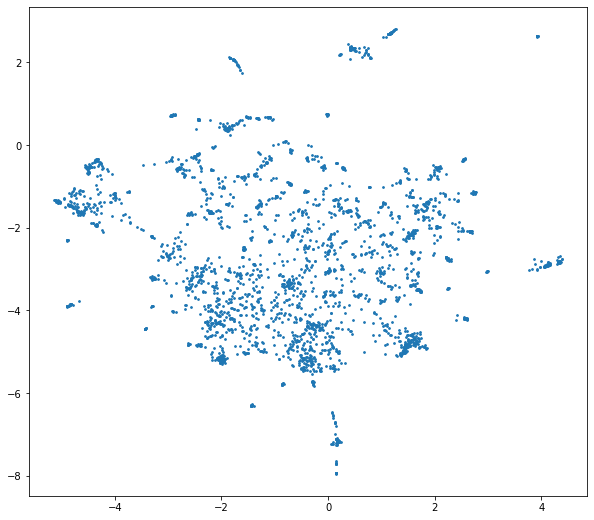

In [97]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Creating a product dictionary

In [98]:
products = train_dataset[['StockCode', 'Description']]

products.drop_duplicates(inplace=True, subset='StockCode', keep='last')

products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
products_dict['22748']

["POPPY'S PLAYHOUSE KITCHEN"]

In [100]:
products_dict['84029G']

['KNITTED UNION FLAG HOT WATER BOTTLE']

## Recommendation Function based on single product vector and will return 6 similar products

In [101]:
def similar_products(v, n = 6):
  ms = model.similar_by_vector(v, topn = n + 1)[1:]
  new_ms = []
  for j in ms:
    pair = (products_dict[j[0]][0], j[1])
    new_ms.append(pair)
  
  return new_ms

In [102]:
similar_products(model['84029G'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RED WOOLLY HOTTIE WHITE HEART.', 0.7696393728256226),
 ('CHOCOLATE HOT WATER BOTTLE', 0.7201017141342163),
 ('RETROSPOT HEART HOT WATER BOTTLE', 0.6841023564338684),
 ('SCOTTIE DOG HOT WATER BOTTLE', 0.6737223863601685),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.6689456701278687),
 ('HOT WATER BOTTLE I AM SO POORLY', 0.6640118360519409)]

In [103]:
similar_products(model['90019A'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('SILVER M.O.P ORBIT DROP EARRINGS', 0.7292970418930054),
 ('RASPBERRY ANT COPPER FLOWER NECKLAC', 0.6618899703025818),
 ('PINK BOUDICCA LARGE BRACELET', 0.6541956663131714),
 ('PINK HEART OF GLASS BRACELET', 0.6426607370376587),
 ('ANT COPPER RED BOUDICCA BRACELET', 0.6326631307601929),
 ('VINTAGE ROSE BEAD BRACELET RASPBERR', 0.6316319704055786)]

## Recommendation function based on average of products vector bought by user and will return 6 similar products

In [104]:
def aggregate_vectors(products):
  product_vec = []
  for i in products:
    try:
      product_vec.append(model[i])
    except KeyError:
      continue
  
  return np.mean(product_vec, axis=0)

In [105]:
len(purchases_val[0])

54

In [106]:
aggregate_vectors(purchases_val[0]).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(100,)

In [107]:
similar_products(aggregate_vectors(purchases_val[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ALARM CLOCK BAKELIKE GREEN', 0.8109757900238037),
 ('ALARM CLOCK BAKELIKE CHOCOLATE', 0.8060528039932251),
 ('ALARM CLOCK BAKELIKE IVORY', 0.7988013029098511),
 ('ALARM CLOCK BAKELIKE PINK', 0.7902514338493347),
 ('ALARM CLOCK BAKELIKE ORANGE', 0.7870926260948181),
 ('GUMBALL MAGAZINE RACK', 0.6257331967353821)]

In [108]:
similar_products(aggregate_vectors(purchases_val[0][-5:]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('JINGLE BELL HEART ANTIQUE GOLD', 0.6952146291732788),
 ('BINGO SET', 0.6761542558670044),
 ('S/15 SILVER GLASS BAUBLES IN BAG', 0.6533063650131226),
 ('VINTAGE SNAKES & LADDERS', 0.6390411853790283),
 ('JINGLE BELL HEART DECORATION', 0.6246345639228821),
 ('CHERUB HEART DECORATION SILVER ', 0.6224830150604248)]

# <font color="blue">**Churn Prediction**</font>